In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import os

In [2]:
final_log = {}
for method in os.listdir("./hz-bc-tyc_1"):
    final_log[method] = pickle.load(open('./hz-bc-tyc_1/%s/log.pkl' % method, 'rb'))[-1]

In [3]:
metrics = ['avg_speed', 'travel_time', 'waiting_time', 'fuel_consumption', 'CO_emission', 'CO2_emission']

In [4]:
data = pd.DataFrame(columns=['method'] + metrics)
for k, v in final_log.items():
    veh_logs = v['veh_logs']
    for log in veh_logs:        
        row = {
            'method': k,
            'avg_speed': log['avg_speed'],
            'travel_time': log['travel_time'],
            'waiting_time': log['waiting_time'],
            'fuel_consumption': log['fuel_consumption'],
            'CO_emission': log['CO_emission'] / 1000000,
            'CO2_emission': log['CO2_emission'] / 1000000,
        }
        data = data.append(row, ignore_index=True)

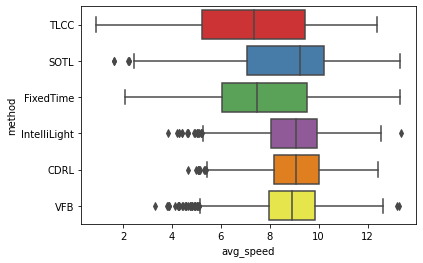

In [5]:
ax = sns.boxplot(y="method", x='avg_speed', data=data, palette="Set1")

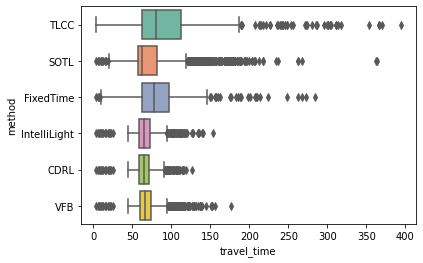

In [6]:
ax = sns.boxplot(y="method", x='travel_time', data=data, palette="Set2")

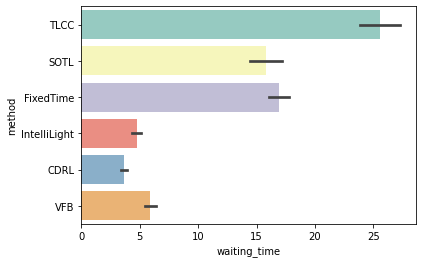

In [7]:
ax = sns.barplot(y="method", x='waiting_time', data=data, palette="Set3")

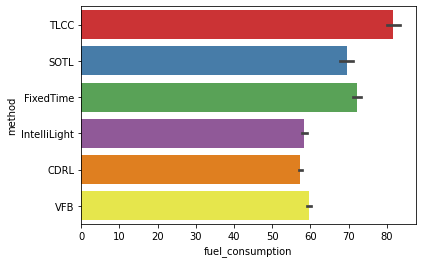

In [8]:
ax = sns.barplot(y="method", x='fuel_consumption', data=data, palette="Set1")

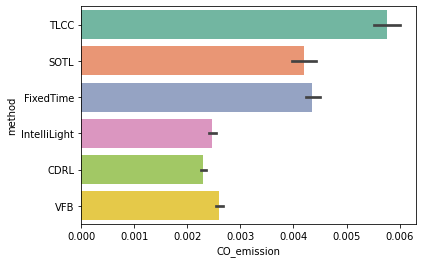

In [9]:
ax = sns.barplot(y="method", x='CO_emission', data=data, palette="Set2")

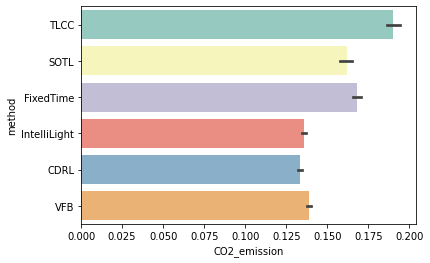

In [10]:
ax = sns.barplot(y="method", x='CO2_emission', data=data, palette="Set3")